In [59]:
#Import the necessary libraries, Modules and classifiers
import numpy as np #NumPy is the fundamental package for scientific computing with Python
import pandas as pd #Pandas package is providing fast, flexible and expressive data structures designed
#to make working with "relational" or "labeled" data both easy and intuitive.

import matplotlib.pyplot as plt #for plotting different kinds of diagrams
#%matplotlib inline is an IPython-specific directive which causes IPython to display matplotlib plots 
#in a notebook cell rather than in another window (commentation on the same line causes an error). 
%matplotlib inline
import seaborn as sns  #Library based on matplotlib, especially for statistical data visuallization

In [60]:
#read the data from a csv-file; ensure that the  values are separated by commas otherwise you need to 
#specify the delimiter explicitly within the following load-statement:
hr_data=pd.read_csv('.\HR_comma_sep.csv',header=0) 

hr_data.head() #showing the first five entries, attribute in brackets will return the # of printed lines 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [61]:
hr_data.rename(columns={'sales':'department'}, inplace=True) #Renaming Columns, note: you do need to 
#specify the existing label first followed by the new label to rename it to afterward 
hr_data_new = pd.get_dummies(hr_data, ['department', 'salary'] ,drop_first = True) #Whether to get 
#k-1 dummies out of k categorical levels by removing the first level. New in version 0.18.0.
hr_data_new.head() #Display of the first entries with dummy variables

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [62]:
hr_data_new.columns #show the column names of new table

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [63]:
###Support Vector machine### 

In [64]:
from sklearn import svm #Import the model for Support vector machines (SVMs) which are a set of 
#supervised learning methods that can be used for classification, regression and outlier detection.
from sklearn.metrics import accuracy_score #Accuracy classification score. In multilabel classification,
#this function computes subset accuracy
from sklearn.model_selection import train_test_split #split arrays or matrices into random train and test subsets

from time import time #provides various time-related functions
from sklearn.svm import SVC #module for C-Support Vector Classification.

In [65]:
df_copy = pd.get_dummies(hr_data,drop_first = True) #Convert categorical variable into dummy variables
df_copy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [66]:
df1 = hr_data_new.copy(deep=True) #data is copied, actual python objects will not be copied recursively
y = df1['left'].values #creation of an array having exactly the same size as values in column 'left'
df1 = df1.drop(['left'],axis=1) #Return new object with labels in requested axis removed.
#more at: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
X = df1.values #We store the other variables in the same manner in X.
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=42,stratify=y)
#The size is set to 40% to achieve an array with less then 10.000 values.

In [67]:
#shape-method returns the dimensions of the created arrays
print  (Xtrain.shape)
print  (Xtest.shape)
print  (ytrain.shape)
print  (ytest.shape)

(8999, 18)
(6000, 18)
(8999,)
(6000,)


In [68]:
linear_clf= svm.SVC(C=10000,kernel="linear",probability=True,random_state=42) #C-parameter trades off 
#misclassification of training examples against simplicity of the decision surface. A low C makes the 
#decision surface smooth, while a high C aims at classifying all training examples correctly; we need 
#probability values for prediction

t0=time() #we use time() functionality to see how long training of the classifier will take
linear_clf.fit(Xtrain,ytrain) #we train the classifier with the linear kernel
print("linear Kernel, C=10000\ntraining time: ", round(time()-t0, 3), "s")  #we print the training time, 
#that is equal to the processing time of the cell

#Calculate Test Prediction with the linear SVC-kernel
y_pred = linear_clf.predict(Xtest)

linear Kernel, C=10000
training time:  793.076 s


In [69]:
#We evaluate the model with the prediction score for train as well as test set. 
svm_score_train = linear_clf.score(Xtrain,ytrain) #Returns the mean accuracy on the train data and labels.
print("Training score: ",svm_score_train)
svm_score_test = linear_clf.score(Xtest, ytest) #Returns the mean accuracy on given train data and labels.
print("Testing score: ",svm_score_test)

Training score:  0.79808867652
Testing score:  0.790333333333


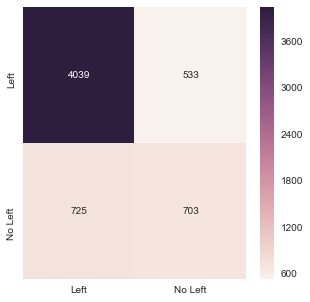

In [70]:
#Plot Confusion Matrix
from sklearn.metrics import confusion_matrix #import the module

cm = confusion_matrix(ytest, y_pred) #We define the confusion matrix with actual against predicted values


df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],
                  columns = [i for i in np.unique(y)])
plt.figure(figsize = (5,5))
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(df_cm, annot=True,  fmt='.0f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"]);

Area Under the Curve: 0.806213255206


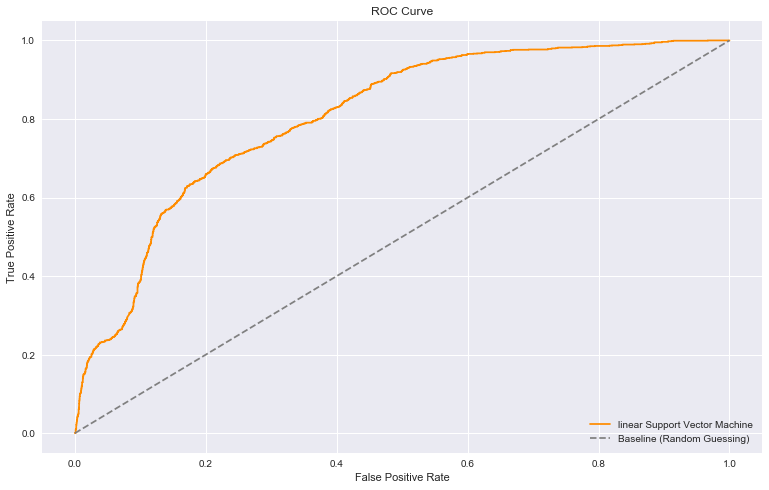

In [71]:
#we use ROC curve for visualization of the true positive rate (TPR) against the false positive rate (FPR)
from sklearn.metrics import roc_curve, roc_auc_score #import the modules for the curve and metrics

probabilities = linear_clf.predict_proba(Xtest)#To be able to plot the curve, probability estimates are 
#used, we calculate them with our trained support vector classifier
fpr, tpr, thresholds = roc_curve(ytest, probabilities[:,1]) #curve is calculated for the entries in 
#ytest against their calculated prediction with Support Vector Classifier
#the roc curve functionality returns fpr, tpr, thresholds; for further information see:
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

rates = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})  #the returned values 
#are saved in a dataframe

roc = plt.figure(figsize = (10,6)) #set the overall size of the diagram-space
rocax = roc.add_axes([0,0,1,1]) #set the range of the axes on plotting area
rocax.plot(fpr, tpr, color='darkorange', label='linear Support Vector Machine') #print the graoh itself
rocax.plot([0,1],[0,1], color='gray', ls='--', label='Baseline (Random Guessing)')#plot of angle bisectrix 
rocax.set_xlabel('False Positive Rate') #labeling x-axis
rocax.set_ylabel('True Positive Rate') #labeling y-axis
rocax.set_title('ROC Curve') #labeling the diagram itself
rocax.legend(loc="lower right") #display the  legend in the lower right corner

print('Area Under the Curve:', roc_auc_score(ytest, probabilities[:,1]))
#For more information about Compute Area Under the Curve (AUC) you can see:
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [72]:
df2 = hr_data_new.copy(deep=True) #data is copied, actual python objects will not be copied recursively
y2 = df2['left'].values #We create an array having exactly the same size as values in column 'left'.
df2 = df2.drop(['left'],axis=1) #Return new object with labels in requested axis removed.
#more at: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
X2 = df2.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X2, y2, test_size=0.4, random_state=42,stratify=y)

In [73]:
#SVM with non-linear kernel function, a.k.a. parameter tuning
rbf_clf=svm.SVC(kernel="rbf",probability=True,random_state=42) #We use now Radial Basis Function (RBF) 
#kernel-function now, we need to set the probability parameter to true being able to make predictions.
#For more details about kernel functions you can see: 
#http://scikit-learn.org/stable/modules/svm.html#svm-kernels

t0=time()  #we use time() functionality to see how long training of the classifier will take
rbf_clf.fit(Xtrain,ytrain)  #we train the classifier with the rbf-kernel
print("rbf Kernel, C=(default=1.0)\ntraining time: ", round(time()-t0, 3), "s")

#Calculate Test Prediction with the linear SVC-kernel
y_pred = rbf_clf.predict(Xtest)

rbf Kernel, C=(default=1.0)
training time:  6.777 s


In [74]:
svm_score_train = rbf_clf.score(Xtrain,ytrain)
print("Training score: ",svm_score_train)
svm_score_test = rbf_clf.score(Xtest, ytest)
print("Testing score: ",svm_score_test)

Training score:  0.952328036448
Testing score:  0.946333333333


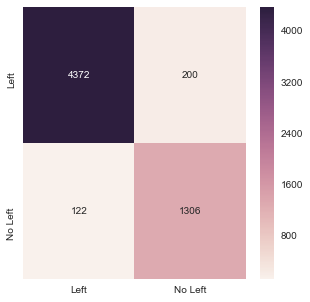

In [75]:
#Non-linear SVM

#Plot Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred)
#The confusion matrix usage is to evaluate the quality of the output of a classifier 
#on the hr analytics data set. The diagonal elements starting in the upper left corner represent 
#the number of points for which the predicted label is equal to the true label, while off-diagonal 
#elements are those that are mislabeled by the classifier. The higher the diagonal values of the 
#confusion matrix the better, because indicating many correct predictions.

import matplotlib.pyplot as plt
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],
                  columns = [i for i in np.unique(y)])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True,  fmt='.0f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"]);

Area Under the Curve: 0.959844633391


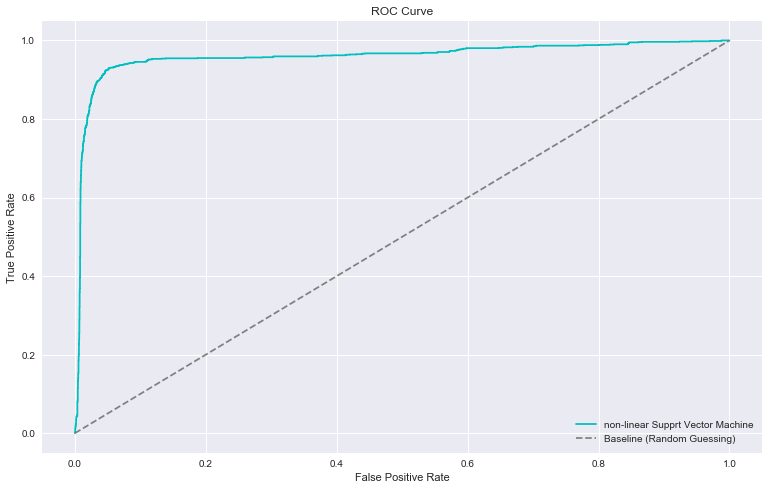

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score

probabilities = rbf_clf.predict_proba(Xtest)
fpr, tpr, thresholds = roc_curve(ytest, probabilities[:,1])

rates = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

roc = plt.figure(figsize = (10,6))
rocax = roc.add_axes([0,0,1,1])
rocax.plot(fpr, tpr, color='c', label='non-linear Supprt Vector Machine')
rocax.plot([0,1],[0,1], color='gray', ls='--', label='Baseline (Random Guessing)')
rocax.set_xlabel('False Positive Rate')
rocax.set_ylabel('True Positive Rate')
rocax.set_title('ROC Curve')
rocax.legend(loc="lower right") #display the  legend in the lower right corner

print('Area Under the Curve:', roc_auc_score(ytest, probabilities[:,1]))